In [2]:
#Install imports
import panel as pn
import hvplot.pandas
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from pathlib import Path
import ta
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /Users/mannyrussell/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/mannyrussell/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/mannyrussell/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

In [3]:
#Read csv data
csv_path = Path('BTC_USD.csv')
btc_df=pd.read_csv(csv_path)

In [4]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)

In [5]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()

In [6]:
# Add features from TA ;ibrary
btc_df = ta.add_all_ta_features(btc_df, "Open", "High", "Low", "Close", "Volumen", fillna=True)

In [7]:
# Check datframe
btc_df.head()

Date    Close     Open     High      Low  Volumen Change %  \
Date                                                                          
2018-01-18  18-Jan-18  11045.0  11101.0  11881.0  10515.0    85240   -0.33%   
2018-01-19  19-Jan-18  11476.0  11036.0  11879.0  10649.0    48550    3.90%   
2018-01-20  20-Jan-18  12728.0  11462.0  13002.0  11425.0    46300   10.91%   
2018-01-21  21-Jan-18  11514.0  12732.0  12732.0  11020.0    53620   -9.54%   
2018-01-22  22-Jan-18  10771.0  11519.0  11886.0  10009.0    66350   -6.45%   

            daily_return    volume_adi  volume_obv  volume_cmf     volume_fi  \
Date                                                                           
2018-01-18           NaN -19094.758419       85240   -0.224012  0.000000e+00   
2018-01-19      0.039022  -2358.823459      133790   -0.017631  2.092505e+07   
2018-01-20      0.109097  27852.146737      180090    0.154657  2.621684e+07   
2018-01-21     -0.095380   5176.399074      126470    0.022149  1.317234e+07   
2018-01-22     -0.064530  -7301.784198       60120   -0.024334  4.247998e+06   

            volume_mfi     volume_em  volume_sma_em    volume_vpt  \
Date                                                                
2018-01-18   50.000000  0.000000e+00   0.000000e+00  19541.851219   
2018-01-19  100.000000  1.672091e+08   1.672091e+08  21452.755716   
2018-01-20  100.000000  3.234042e+09   1.700626e+09   6945.729445   
2018-01-21   64.064711 -1.077583e+09   7.745561e+08    -63.087245   
2018-01-22   45.375333 -2.626668e+09  -7.575006e+07  -9395.864360   

             volume_nvi   volume_vwap  volatility_atr  volatility_bbm  \
Date                                                                    
2018-01-18  1000.000000  11147.000000             0.0    11045.000000   
2018-01-19  1039.022182  11215.100879             0.0    11260.500000   
2018-01-20  1152.376641  11515.874544             0.0    11749.666667   
2018-01-21  1152.376641  11570.813487             0.0    11690.750000   
2018-01-22  1152.376641  11419.975516             0.0    11506.800000   

            volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  \
Date                                                                         
2018-01-18    11045.000000    11045.000000        0.000000        0.000000   
2018-01-19    11691.500000    10829.500000        7.655077        0.750000   
2018-01-20    13177.291579    10322.041755       24.300688        0.842644   
2018-01-21    12943.841677    10437.658323       21.437319        0.429474   
2018-01-22    12847.543316    10166.056684       23.303496        0.225600   

            volatility_bbhi  volatility_bbli  volatility_kcc  volatility_kch  \
Date                                                                           
2018-01-18              0.0              0.0    11147.000000    12513.000000   
2018-01-19              0.0              0.0    11240.833333    12538.833333   
2018-01-20              0.0              0.0    11622.222222    13013.222222   
2018-01-21              0.0              0.0    11655.500000    13126.750000   
2018-01-22              0.0              0.0    11502.133333    13054.533333   

            volatility_kcl  volatility_kcw  volatility_kcp  volatility_kchi  \
Date                                                                          
2018-01-18     9781.000000       24.508836        0.462665              0.0   
2018-01-19     9942.833333       23.094373        0.590588              0.0   
2018-01-20    10231.222222       23.936902        0.897476              0.0   
2018-01-21    10184.250000       25.245592        0.451912              0.0   
2018-01-22     9949.733333       26.993253        0.264515              0.0   

            volatility_kcli  volatility_dcl  volatility_dch  volatility_dcm  \
Date                                                                          
2018-01-18              0.0         10515.0         11881.0         11198.0   
2018-01

## Define functions


In [24]:
def BTC():
    btc_price = btc_df[['Close']].hvplot.area(
    xlabel='Date',
    alpha =0.3,
    width = 900,
    height = 500
)
    return btc_price

def EMA():
    """Exponential Moving Average"""  
    # Set short and long windows
    short_window = 1
    long_window = 10

    # Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
    btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
    btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

    # Construct a crossover trading signal
    btc_df['ema_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
    btc_df['ema_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
    btc_df['ema_signal'] = btc_df['ema_long'] + btc_df['ema_short']

    ema_indicator = btc_df[['fast_close', 'slow_close']].hvplot(
        xlabel='Date',
        title='Exponential Moving Average of Closing Prices',
        width = 700,
        height = 500
    ).opts(legend_position='top_left')
    return ema_indicator

def EMV():
    """Exponential Moving Average of Daily Return Volatility (EMV)"""
    # Set short and long volatility windows
    short_vol_window = 1
    long_vol_window = 10

    # Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
    btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
    btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

    # Construct a crossover trading signal
    btc_df['emv_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
    btc_df['emv_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
    btc_df['emv_signal'] = btc_df['emv_long'] + btc_df['emv_short']

    emv_indicator = btc_df[['fast_vol', 'slow_vol']].hvplot(
    ylim=(0, 0.25),
    xlabel='Date',
    title='Exponential Moving Average of Daily Return Volatility (EMV)',
    width = 900,
    height = 500
    ).opts(legend_position='top_left')
    return emv_indicator
    
def BB():
    # Set bollinger band window
    bollinger_window = 20

    # Calculate rolling mean and standard deviation
    btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
    btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

    # Calculate upper and lowers bands of bollinger band
    btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
    btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

    # Calculate bollinger band trading signal
    btc_df['bb_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
    btc_df['bb_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
    btc_df['bb_signal'] = btc_df['bb_long'] + btc_df['bb_short']
    
    bb_indicator = btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].hvplot(
        xlabel='Date',
        title="Bollinger Bands",
        width = 900,
        height = 500
    ).opts(legend_position='top_left')
    return bb_indicator

def MACD():
    """Moving Average Convergence Divergence (MACD)"""
    #Calculate the Short Term Exponential Moving Average
    ShortEMA = btc_df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
    #Calculate the Long Term Exponential Moving Average
    LongEMA = btc_df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
    #Calculate the Moving Average Convergence/Divergence (MACD)
    MACD = ShortEMA - LongEMA
    #Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()
    #Create new columns for the data frame 
    btc_df['MACD'] = MACD
    btc_df['Signal Line'] = signal
    #Calculate MACD trading Signals
    btc_df['macd_long'] = np.where(btc_df['MACD'] > btc_df['Signal Line'], 1.0, 0.0)
    btc_df['macd_short'] = np.where(btc_df['MACD'] < btc_df['Signal Line'], -1.0, 0.0)
    btc_df['macd_signal'] = btc_df['macd_long'] + btc_df['macd_short']
    
    macd_calc = btc_df[['MACD','Signal Line']].hvplot.line(
        xlabel='Date',
        title='MACD',
        width = 900,
        height = 500
    ).opts(legend_position='top_left')
    return macd_calc

def RSI():
    """Relative Strength Index (RSI)"""
    delta = btc_df['Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
    delta = delta.dropna() # or delta[1:]
    up =  delta.copy() #Make a copy of this object's indices and data
    down = delta.copy() #Make a copy of this object's indices and data
    up[up < 0] = 0 
    down[down > 0] = 0 
    time_period = 14
    AVG_Gain = up.rolling(window=time_period).mean()
    AVG_Loss = abs(down.rolling(window=time_period).mean())
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/ (1.0 + RS))
    btc_df["RSI"] = RSI
    #Calculate RSI Trading Signal
    btc_df['rsi_long'] = np.where(btc_df['RSI'] < 30, 1.0, 0.0)
    btc_df['rsi_short'] = np.where(btc_df['RSI'] > 70, -1.0, 0.0)
    btc_df['rsi_signal'] = btc_df['rsi_long'] + btc_df['rsi_short']
    
    rsi_indicator = plt.figure(figsize=(10,7))
    new_df = pd.DataFrame()
    new_df['RSI'] = RSI
    plt.title('RSI')
    plt.plot(new_df.index, new_df['RSI'])
    plt.axhline(30, linestyle='--',color = 'red')
    plt.axhline(70, linestyle='--', color = 'red')
    
    plt.close(rsi_indicator)
    
    return pn.pane.Matplotlib(rsi_indicator, tight=True)

def CMF():
    """Chaikin Money Flow (CMF)"""
    # Calculate Trading Signal
    btc_df['cmf_long'] = np.where(btc_df['volume_cmf'] > 0, 1.0, 0.0)
    btc_df['cmf_short'] = np.where(btc_df['volume_cmf'] < 0, -1.0, 0.0)
    btc_df['cmf_signal'] = btc_df['cmf_long'] + btc_df['cmf_short']
    
    cmf_indicator = btc_df[['volume_cmf']].hvplot(
        xlabel='Date',
        title='CMF',
        width = 900,
        height = 500
    )
    return cmf_indicator
def ICHI():
    """Ichimoku (ICHI)"""
    # Calculate Trading Signal
    btc_df['ichi_long'] = np.where(btc_df['trend_ichimoku_a'] > btc_df['trend_ichimoku_b'], 1.0, 0.0)
    btc_df['ichi_short'] = np.where(btc_df['trend_ichimoku_a'] < btc_df['trend_ichimoku_b'], -1.0, 0.0)
    btc_df['ichi_signal'] = btc_df['ichi_long'] + btc_df['ichi_short']
    
    ichi_indicator = btc_df[['trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b']].hvplot(
        xlabel='Date',
        title='ICHI',
        width = 900,
        height = 500
    )
    return ichi_indicator
def KEL():
    """Keltner Channel(KEL)"""
    # Calculate Trading Signal
    btc_df['kel_long'] = np.where(btc_df['volatility_kchi'] >1, 1.1, 0.0)
    btc_df['kel_short'] = np.where(btc_df['volatility_kcli'] <0.2, -1.0, 0.0)
    btc_df['kel_signal'] = btc_df['kel_long'] + btc_df['kel_short']
    
    kel_indicator =plt.figure(figsize=(10,10)) 
    
    keltner_df = pd.DataFrame()
    keltner_df['Close'] = btc_df['Close']
    keltner_df['Keltner_H'] =btc_df['volatility_kch']
    keltner_df['Keltner_L'] =btc_df['volatility_kcl']
    keltner_df['keltner'] = btc_df['volatility_kcc']

    plt.plot(keltner_df.index, keltner_df['Close'])
    plt.plot(keltner_df['Keltner_H'])
    plt.plot(keltner_df['Keltner_L'])
    plt.plot(keltner_df['keltner'])
    #,keltner_df['Low'],keltner_df['keltner'])
    plt.title('Keltner Channel')
    plt.ylabel('Price USD ($)',fontsize=18)
    plt.legend(keltner_df.columns.values, loc='upper left')
    
    plt.close(kel_indicator)
    return pn.pane.Matplotlib(kel_indicator, tight=True)

def ARO():
    """"Aroon Indicator (ARO)"""
    # Calculte trading signal
    btc_df['aro_long'] = np.where(btc_df['trend_aroon_up'] > btc_df['trend_aroon_down'], 1.0, 0.0)
    btc_df['aro_short'] = np.where(btc_df['trend_aroon_up'] < btc_df['trend_aroon_down'], -1.0, 0.0)
    btc_df['aro_signal'] = btc_df['aro_long'] + btc_df['aro_short']
    
    aro_indicator = btc_df[['trend_aroon_up','trend_aroon_down']].hvplot(
        xlabel='Date',
        title='ARO',
        width = 900,
        height = 500
    )
    return aro_indicator

def VOR():
    """"Vortex Indicator (VOR)"""
    #Calculate trading signal
    btc_df['vor_long'] = np.where(btc_df['trend_vortex_ind_diff'] >= 1, 1.0, 0.0)
    btc_df['vor_short'] = np.where(btc_df['trend_vortex_ind_diff'] < 0, -1.0, 0.0)
    btc_df['vor_signal'] = btc_df['vor_long'] + btc_df['vor_short']
    
    #Plot Vortex
    vortex_df = pd.DataFrame()
    vortex_df['Vortex'] = btc_df['trend_vortex_ind_diff']
    vortex_df['vortex_pos']= btc_df['trend_vortex_ind_pos']
    vortex_df['vortex_neg']= btc_df['trend_vortex_ind_neg']

    vortex_df = vortex_df.drop(columns=['Vortex'])

    vortex_plot = plt.figure(figsize=(10,10))
    plt.title('VORTEX')
    plt.plot(vortex_df.index, vortex_df['vortex_pos'],vortex_df['vortex_neg'])
    plt.legend(vortex_df.columns.values, loc='upper left')
    plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
    plt.axhline(1.75, linestyle='--', alpha=0.5, color = 'green')
    plt.axhline(0, linestyle='--',color = 'red')
    plt.axhline(0.75, linestyle='--', alpha=0.5, color = 'black')
    plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
    plt.ylabel('Vortex Values (0 - 1)',fontsize=18)
    plt.tight_layout()

    plt.close(vortex_plot)
    return pn.pane.Matplotlib(vortex_plot, tight=True)

def SENT():
    
    return 
    

In [23]:
btc_df[['fast_vol', 'slow_vol']].hvplot( 
    ylim=(0, 0.25),
    xlabel='Date',
    title='Exponential Moving Average of Daily Return Volatility (EMV)',
    width = 900,
    height = 500
    ).opts(legend_position='top_left')

    

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [22]:
EMV()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

# Panel Visuals

In [25]:
pn.extension('plotly')

title = pn.pane.Markdown(
    """
# Bitcoin Analysis from 2018 to 2021
""",
    width=800,
)

btc_plot1 = pn.Column(
    "##Bitcoin Price", BTC(),
       """
This dashboard presents a visual analysis of historical prices of Bitcoin from 2018 to 2021.
"""
)
btc_plot = pn.Column(
    "##Exponential Moving Average",EMA(),
    "##Exponential Moving Average of Daily Return Volatility (EMV)", EMV(),
    "##Moving Average Convergence Divergence (MACD)", MACD(),
    "##Bollinger Bands", BB(),
    "##Relative Strength Index", RSI(),
    "##Chaikin Money Flow",(CMF),
    "##Ichimoku",(ICHI),
    "##Keltner Channel",(KEL),
    "##Aroon",(ARO),
    "##Vortex",(VOR)
)

btc_plot2 = pn.Column(
    "##Sentiment Analysis", SENT()
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(Area)
        [2] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] Markdown(str)
        [3] HoloViews(NdOverlay)
        [4] Markdown(str)
        [5] HoloViews(NdOverlay)
        [6] Markdown(str)
        [7] HoloViews(NdOverlay)
        [8] Markdown(str)
        [9] Matplotlib(Figure, tight=True)
        [10] Markdown(str)
        [11] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive22939')
        [12] Markdown(str)
        [13] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive23024')
        [14] Markdown(str)
        [15] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
        [16] Markdown(str)
        [17] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive23188')
        [18] Markdown(str)
        [19] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
    [2] Column
        [0] Markdown(str)
        [1] Str(None)
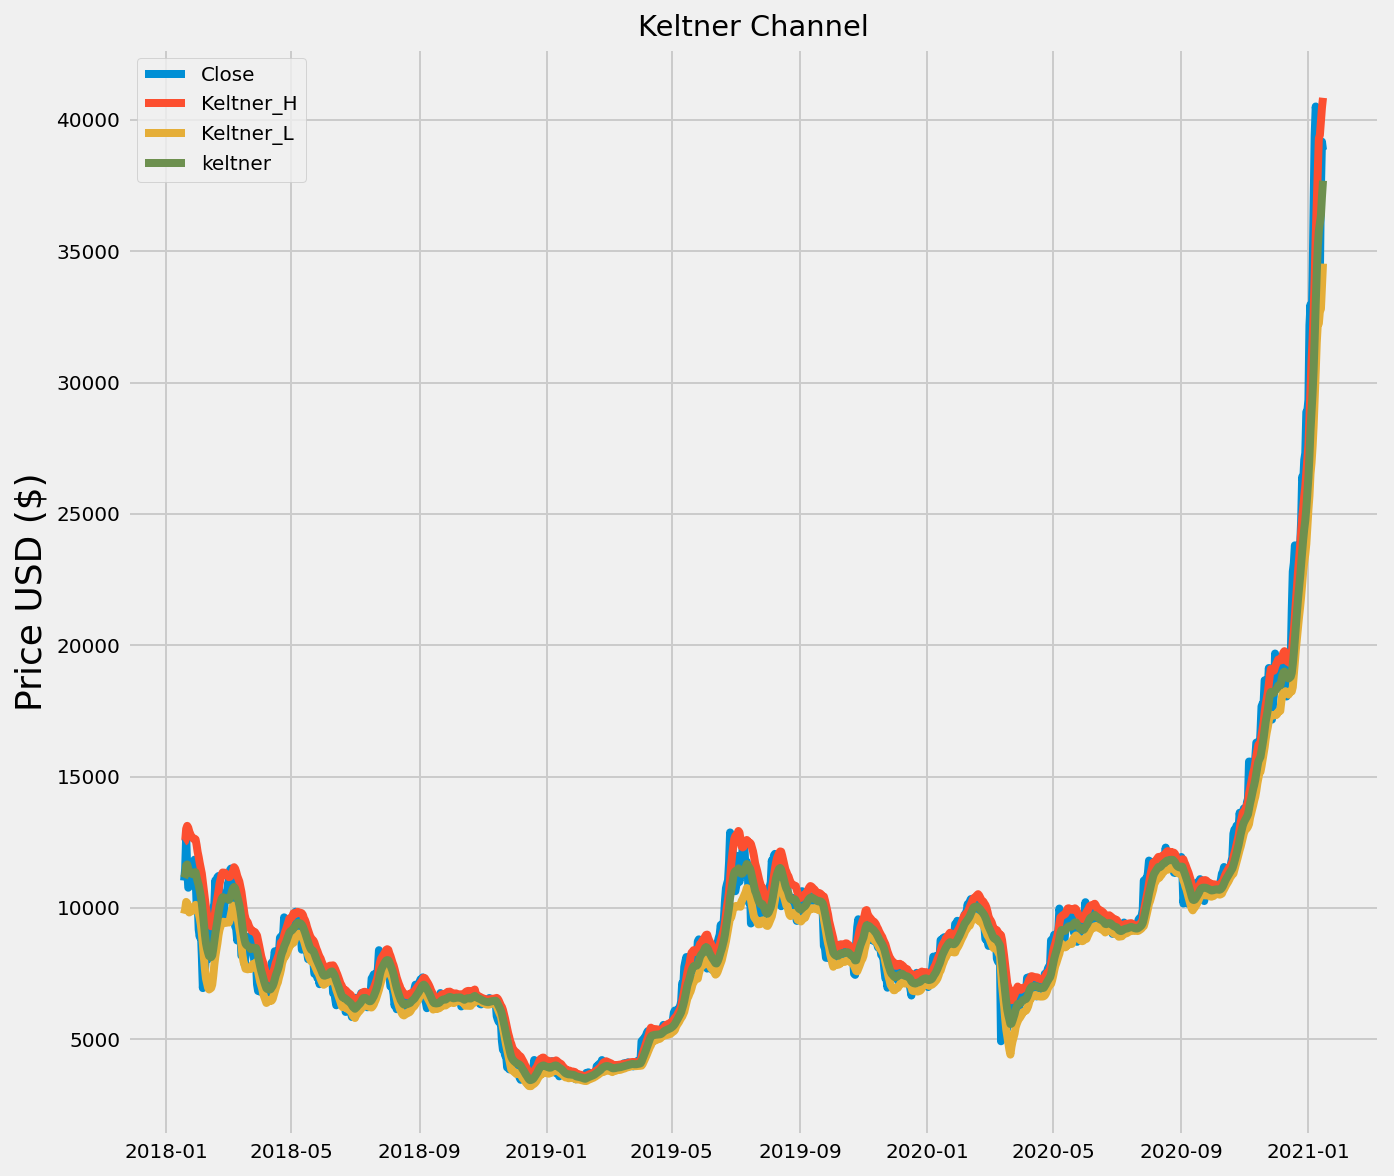
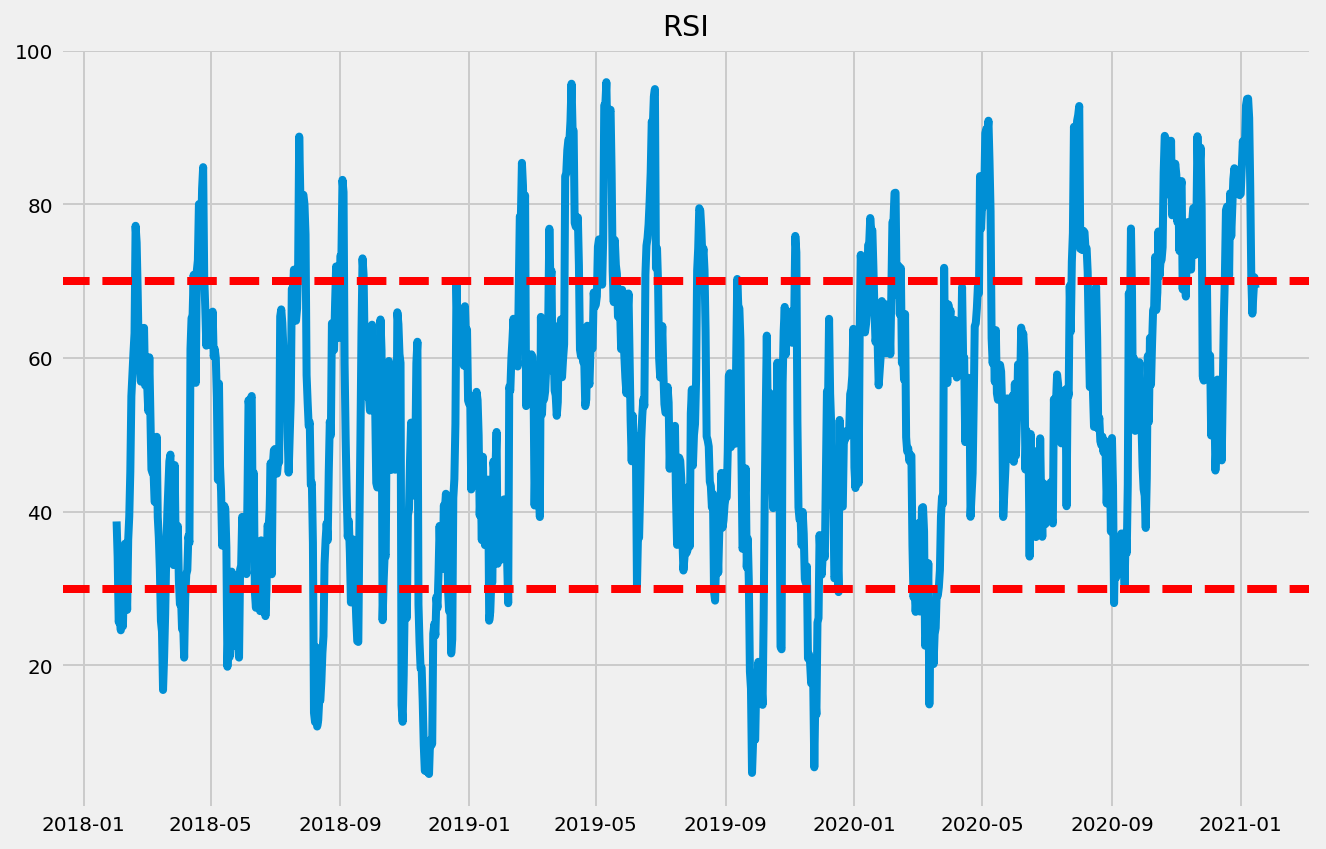
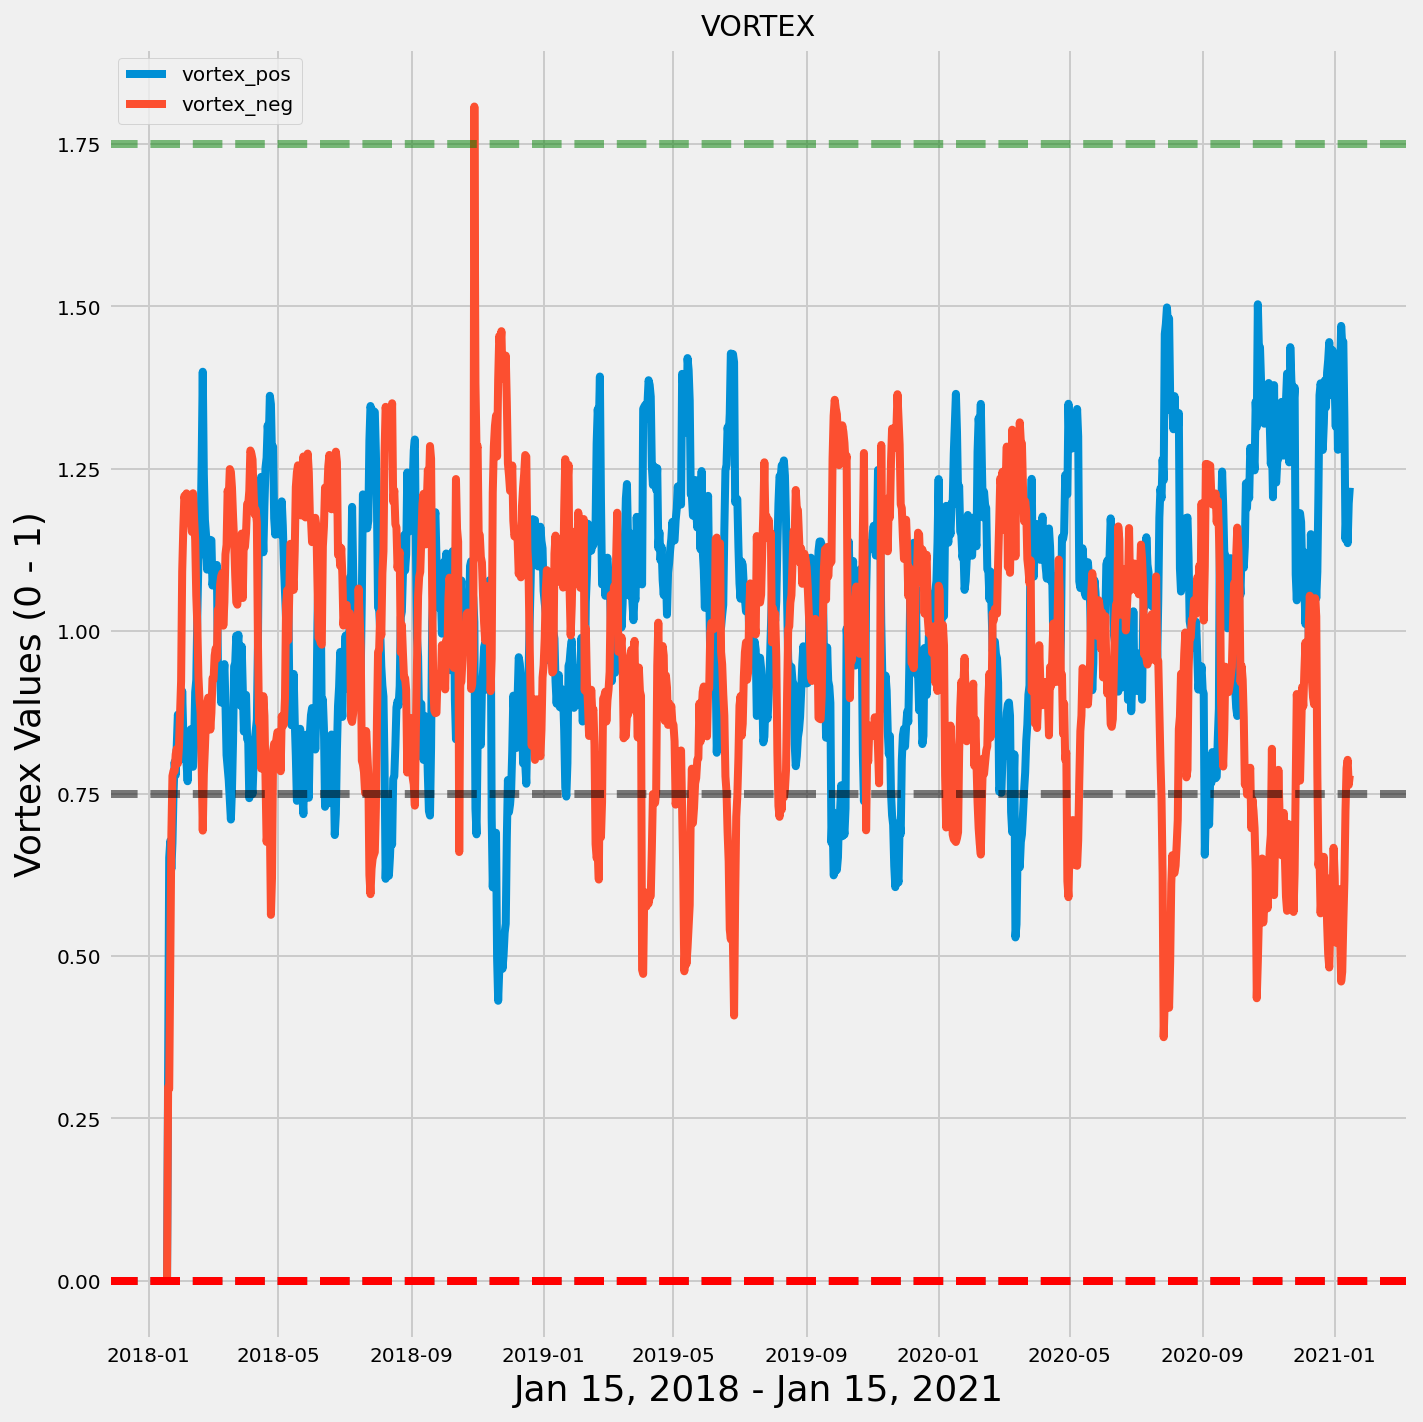

In [26]:
dashboard = pn.Tabs(
    ("Bitcoin",btc_plot1),
    ("Technical Indicators",btc_plot),
    ("Sentiment Analysis",btc_plot2)
 
)
dashboard